## 독버섯 분류기

### [1] 데이터 불러오기

In [3]:
# 라이브러리 호출
import pandas as pd
import numpy as np

In [4]:
# 데이터 불러오기
data = pd.read_csv('./data/mushroom.csv')

In [5]:
# 데이터 살펴보기
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [6]:
# 컬럼 명과 인덱스가 없으니 컬럼을 만들어서 데이터를 새로 불러오자
data = pd.read_csv('./data/mushroom.csv', index_col=None, header=None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
data.shape

(8124, 23)

In [9]:
# 결측치 확인
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [10]:
# 0번째 컬럼이 target 데이터로 나머지는 feature
data_input = data.iloc[:,1:23]
data_target = data[0]

In [11]:
# 타겟 데이터는 p(poisonous) : 독버섯(1) / e(edible) : 식용(0) 으로 분류하자
for i in range(0, len(data_target)) :
    if (data_target[i] == 'p') :
        data_target[i] = 1
    elif (data_target[i] == 'e') :
        data_target[i] = 0

In [12]:
# 식용 버섯과 독버섯 비중
sum(data_target) / len(data_target)

0.48202855736090594

In [13]:
# feature 컬럼들 확인
for i in range(1, len(data_input.columns) + 1) :
    print(f'{i}번째 컬럼의 values \n', data_input[i].value_counts())

1번째 컬럼의 values 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: 1, dtype: int64
2번째 컬럼의 values 
 y    3244
s    2556
f    2320
g       4
Name: 2, dtype: int64
3번째 컬럼의 values 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: 3, dtype: int64
4번째 컬럼의 values 
 f    4748
t    3376
Name: 4, dtype: int64
5번째 컬럼의 values 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: 5, dtype: int64
6번째 컬럼의 values 
 f    7914
a     210
Name: 6, dtype: int64
7번째 컬럼의 values 
 c    6812
w    1312
Name: 7, dtype: int64
8번째 컬럼의 values 
 b    5612
n    2512
Name: 8, dtype: int64
9번째 컬럼의 values 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: 9, dtype: int64
10번째 컬럼의 values 
 t    4608
e    3516
Name: 10, dtype: int64
11번째 컬럼의 values 
 b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64
12번째 컬럼

대부분의 데이터는 알파벳으로 구성되어있지만 11번째 컬럼에는 ?가 포함되어 있는 걸 알 수 있다

In [14]:
data_input.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# 전체 문자 데이터를 숫자로 처리할 dic 생성
dic_alphabet = {}
for i in range(0, 26):
    dic_alphabet[chr(97 + i)] = i
# ?는 30으로 저장
dic_alphabet['?'] = 30

In [16]:
# data_input 의 각 컬럼을 데이터를 숫자로 반환
for i in range(1, len(data_input.columns) + 1) :
    data_input[i] = data_input[i].map(dic_alphabet)

In [17]:
data_target.value_counts()

0    4208
1    3916
Name: 0, dtype: int64

In [18]:
for i in range(1, len(data_input.columns) + 1) :
    print(f'{i}번째 컬럼의 values \n', data_input[i].value_counts())

1번째 컬럼의 values 
 23    3656
5     3152
10     828
1      452
18      32
2        4
Name: 1, dtype: int64
2번째 컬럼의 values 
 24    3244
18    2556
5     2320
6        4
Name: 2, dtype: int64
3번째 컬럼의 values 
 13    2284
6     1840
4     1500
24    1072
22    1040
1      168
15     144
2       44
20      16
17      16
Name: 3, dtype: int64
4번째 컬럼의 values 
 5     4748
19    3376
Name: 4, dtype: int64
5번째 컬럼의 values 
 13    3528
5     2160
24     576
18     576
0      400
11     400
15     256
2      192
12      36
Name: 5, dtype: int64
6번째 컬럼의 values 
 5    7914
0     210
Name: 6, dtype: int64
7번째 컬럼의 values 
 2     6812
22    1312
Name: 7, dtype: int64
8번째 컬럼의 values 
 1     5612
13    2512
Name: 8, dtype: int64
9번째 컬럼의 values 
 1     1728
15    1492
22    1202
13    1048
6      752
7      732
20     492
10     408
4       96
24      86
14      64
17      24
Name: 9, dtype: int64
10번째 컬럼의 values 
 19    4608
4     3516
Name: 10, dtype: int64
11번째 컬럼의 values 
 1     3776
30    2480
4     112

### [2] 모델 생성

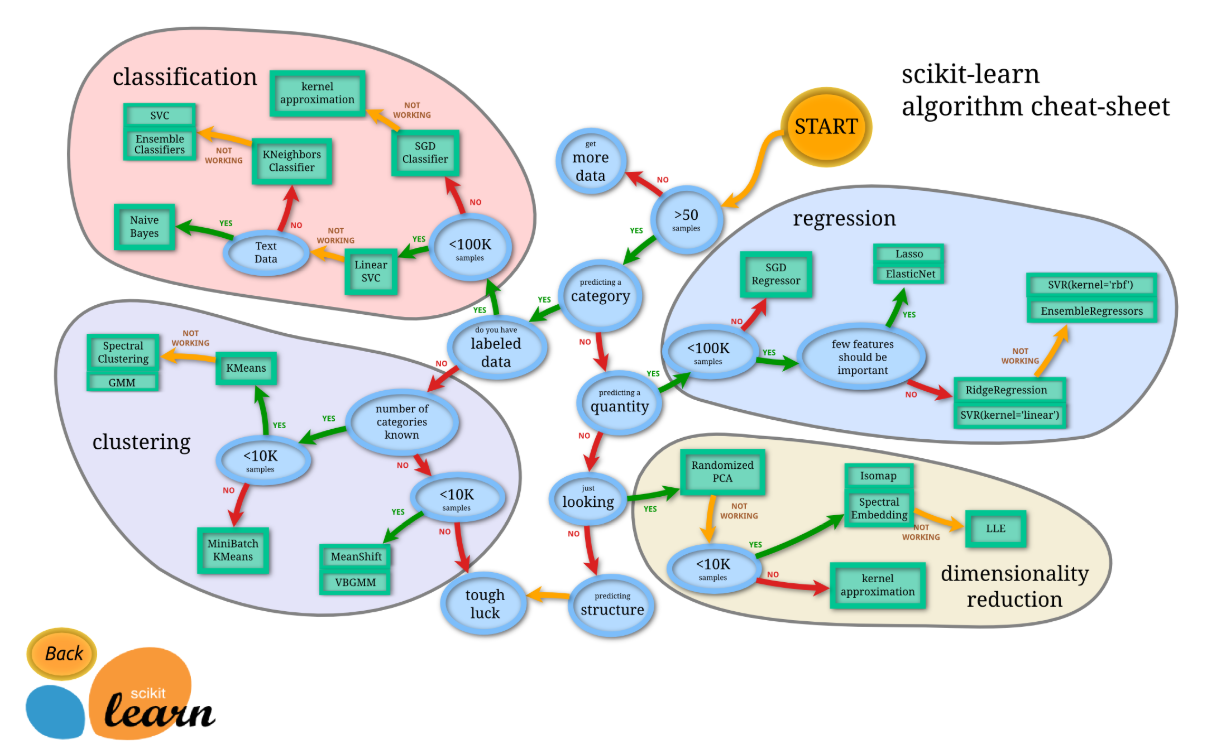

In [19]:
from IPython.display import Image 
Image("./data/img.png")

모델은 SVM 사용

In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [21]:
data_target = data_target.astype('int64')

In [22]:
# 훈련 데이터와 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state= 42
)

In [23]:
# 모델 생성 및 훈련
model = svm.SVC()
model.fit(train_input, train_target)


SVC()

In [24]:
print('훈련 점수 :', model.score(train_input, train_target))
print('테스트 점수 :', model.score(test_input, test_target))

훈련 점수 : 0.9978664040702445
테스트 점수 : 0.9985228951255539


### [3] all_estimator()

In [39]:
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

all_algorithms = all_estimators(type_filter='classifier')


list_name_model = []
list_train_score = []
list_test_score = []


for (name, algorithm) in all_algorithms:
    try :
        clf = algorithm()
        clf.fit(train_input, train_target)

        list_train_score.append(round(clf.score(train_input,train_target), 3))
        list_test_score.append(round(clf.score(test_input,test_target), 3))
        list_name_model.append(name)
    except :
        continue

In [40]:
df = pd.DataFrame([list_name_model, list_train_score, list_test_score]).T
df.columns = ['모델', '훈련 점수', '테스트 점수']
df

,모델,훈련 점수,테스트 점수
0,AdaBoostClassifier,1.0,1.0
1,BaggingClassifier,1.0,1.0
2,BernoulliNB,0.597,0.608
3,CalibratedClassifierCV,0.954,0.95
4,CategoricalNB,0.954,0.949
5,ComplementNB,0.769,0.778
6,DecisionTreeClassifier,1.0,1.0
7,DummyClassifier,0.52,0.512
8,ExtraTreeClassifier,1.0,1.0
9,ExtraTreesClassifier,1.0,1.0


### [4] 교차검증

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# n_split : 몇개로 분할할지
# shuffle : Fold를 나누기 전에 무작위로 섞을지
# random_state : 나눈 Fold를 그대로 사용할지
kfold = KFold(n_splits=10, shuffle = True, random_state=0)

# 파라미터는 (모델, Traingdata의 feature, Trainingdata의 target, 폴드수) 이다.
scores = cross_val_score(model , data_input , data_target ,cv= kfold)

# Trainingdata에 대한 성능을 나타낸다.
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [1.     0.9975 0.9988 0.9975 1.     0.9975 0.9975 0.9988 0.9975 0.9951]
평균 검증 정확도: 0.998


### [5] 튜링

### [*] 시각화 해보기

In [27]:
data_input = pd.DataFrame(data_input)
data_target = pd.DataFrame(data_target)

alldata = pd.concat([data_input, data_target], axis=1)

In [28]:
p_data = alldata[alldata[0] == 1]
e_data = alldata[alldata[0] == 0]

In [29]:
p_mean = p_data.iloc[:,:-1].mean()
e_mean = e_data.iloc[:,:-1].mean()

In [30]:
columns = p_data.columns[:-1]

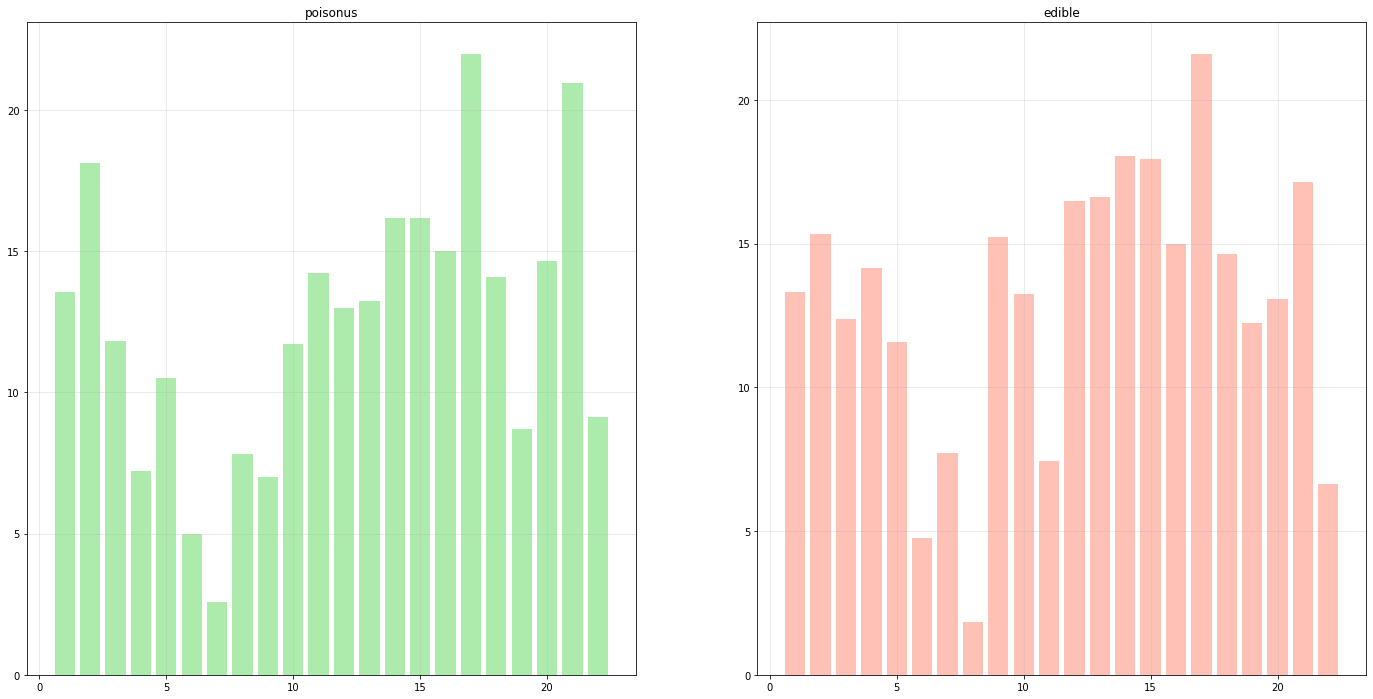

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))

plt.subplot(1, 2, 1)
plt.bar(columns, p_mean, color = 'limegreen', alpha = .4)
plt.title('poisonus')
plt.grid(True, alpha = .3)

plt.subplot(1, 2, 2)
plt.bar(columns, e_mean, color = 'tomato', alpha = .4)
plt.title('edible')
plt.grid(True, alpha = .3)

plt.show()

### [*] 트리로 해보기

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=6)

model_tree.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=6)

In [33]:
print('훈련 점수 :', model_tree.score(train_input, train_target))
print('테스트 점수 :', model_tree.score(test_input, test_target))

훈련 점수 : 0.9988511406532086
테스트 점수 : 0.999507631708518


In [34]:
list_num = []
list_train_score = []
list_test_score = []

for i in range(1, 8) :
    model_tree = DecisionTreeClassifier(max_depth= i)
    model_tree.fit(train_input, train_target)
    list_num.append(i)
    list_train_score.append(model_tree.score(train_input, train_target))
    list_test_score.append(model_tree.score(test_input, test_target))

Text(0.5, 1.0, 'score by model max depth')

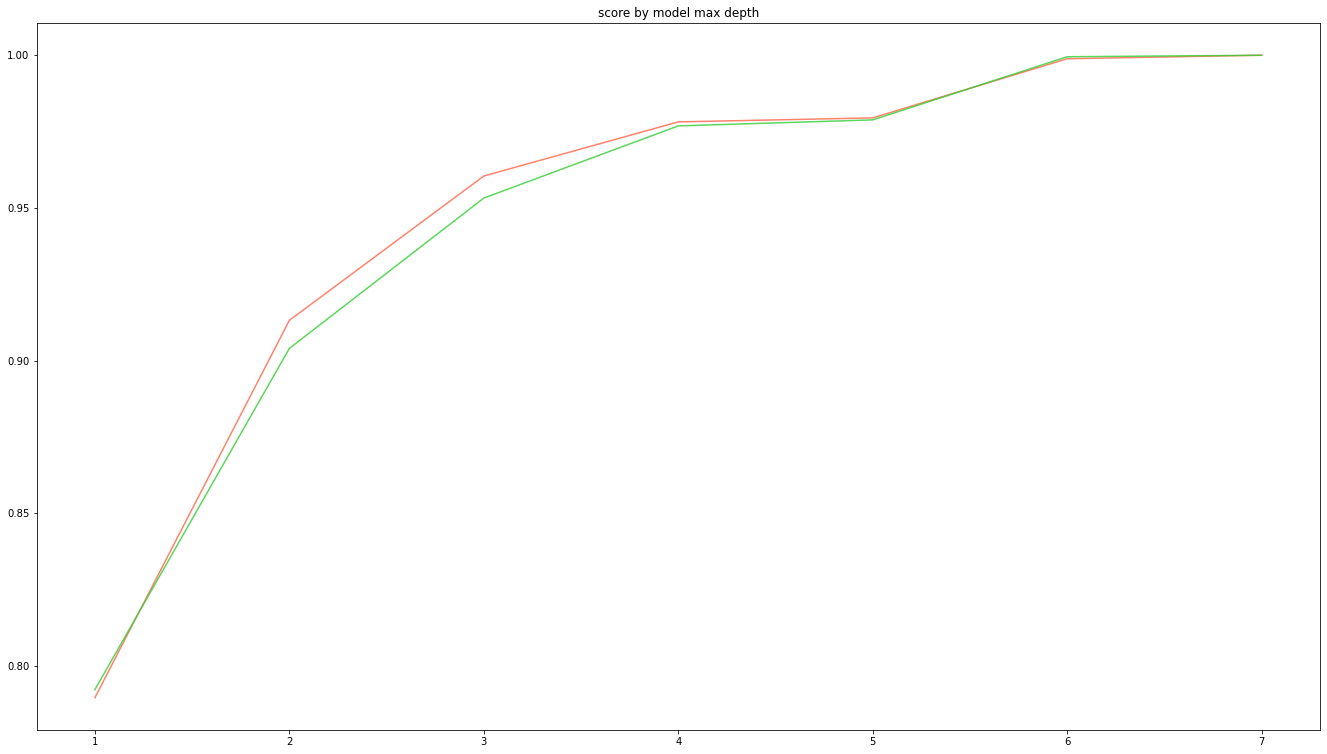

In [35]:
plt.figure(figsize=(23,13))
plt.plot(list_num, list_train_score, color = 'tomato', alpha = 0.8)
plt.plot(list_num, list_test_score, color = 'limegreen', alpha = 0.8)
plt.title("score by model max depth")


depth가 6이 되도 이미 과대 적합이다.

[Text(0.42391304347826086, 0.9166666666666666, 'X[8] <= 8.5\ngini = 0.499\nsamples = 6093\nvalue = [3168, 2925]'),
 Text(0.1956521739130435, 0.75, 'X[20] <= 19.5\ngini = 0.278\nsamples = 2463\nvalue = [410, 2053]'),
 Text(0.08695652173913043, 0.5833333333333334, 'X[10] <= 1.5\ngini = 0.211\nsamples = 441\nvalue = [388, 53]'),
 Text(0.043478260869565216, 0.4166666666666667, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.13043478260869565, 0.4166666666666667, 'gini = 0.0\nsamples = 388\nvalue = [388, 0]'),
 Text(0.30434782608695654, 0.5833333333333334, 'X[21] <= 17.5\ngini = 0.022\nsamples = 2022\nvalue = [22, 2000]'),
 Text(0.21739130434782608, 0.4166666666666667, 'X[12] <= 7.5\ngini = 0.008\nsamples = 1992\nvalue = [8, 1984]'),
 Text(0.17391304347826086, 0.25, 'X[1] <= 21.0\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.13043478260869565, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.21739130434782608, 0.08333333333333333, 'gini = 0.0\nsamples = 

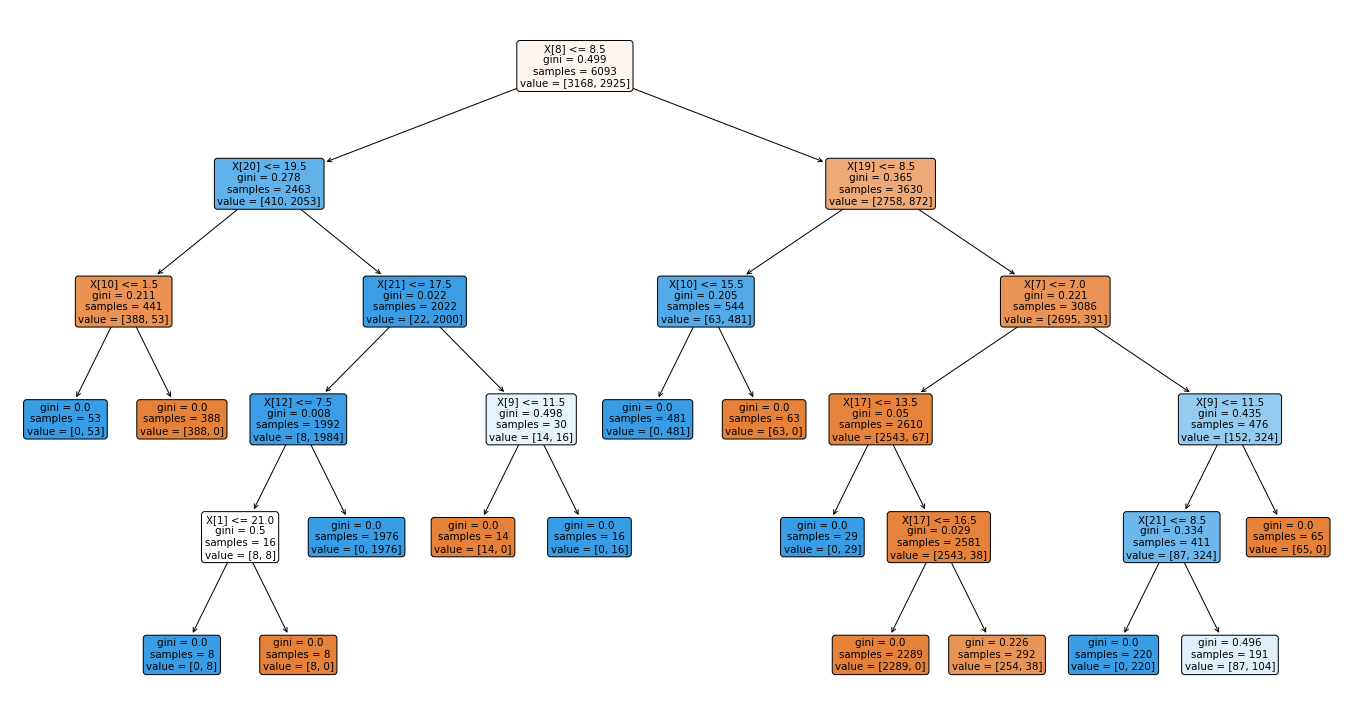

In [36]:
from sklearn.tree import plot_tree

model_tree = DecisionTreeClassifier(max_depth= 5)
model_tree.fit(train_input, train_target)

plt.figure(figsize=(24,13))
plot_tree(model_tree, filled=True, rounded=True)

## [*] SGDClassifier

In [46]:
from sklearn.linear_model import SGDClassifier

modelSGD = SGDClassifier().fit(train_input, train_target)

print('훈련 점수 :', modelSGD.score(train_input, train_target))
print('테스트 점수 :', modelSGD.score(test_input, test_target))

훈련 점수 : 0.9515837846709339
테스트 점수 : 0.9492860659773511


- 이걸 규제를 L1으로 변경하면?

In [56]:
modelSGD = SGDClassifier(penalty = 'l1').fit(train_input, train_target)

print('훈련 점수 :', modelSGD.score(train_input, train_target))
print('테스트 점수 :', modelSGD.score(test_input, test_target))
print('점수 차 :', modelSGD.score(train_input, train_target) - modelSGD.score(test_input, test_target))

훈련 점수 : 0.9451829968816675
테스트 점수 : 0.9359921221073363
점수 차 : 0.009190874774331226


규제가 더 빡빡해진만큼 과대적합이 약간 더 증가한 것을 알 수 있다.

- 훈련 값 (기본값 = 1000)에서 늘리면 어떻게 될까?

In [75]:
list_num = []
list_score_tr =[]
list_score_te =[]
for i in range(1000, 100000, 1000) :
    list_num.append(i)
    modelSGD = SGDClassifier(penalty = 'l1', max_iter= i).fit(train_input, train_target)
    list_score_tr.append(modelSGD.score(train_input, train_target))
    list_score_te.append(modelSGD.score(test_input, test_target))

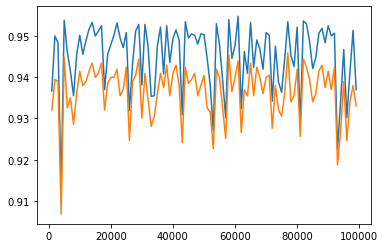

In [77]:
plt.plot(list_num, list_score_tr)
plt.plot(list_num, list_score_te)

별 상관없다

In [79]:
modelSGD.coef_

array([[   1.60151621,   53.92525754,   -1.73119948,  -78.4592368 ,
        -226.20676988, -105.20937222, -247.27425279,  459.80720717,
         -28.07290845,  192.76689207, -130.19240778, -190.95123886,
           2.40696078,  -31.55355739,  -19.64793014, -249.56472869,
         -99.18445079,  994.29968139, -100.55467003,  -40.21894523,
         -86.25522014,  -39.11201181]])

In [81]:
modelSGD.intercept_

array([-17.06325134])

기울기를 보니 22번째 값과 10번째 값이 가장 크다  
이 둘로만 분류할 수 있을까?

In [98]:
data_2 = data_input[[9, 21]]

In [99]:
train_input_02, test_input_02 = train_test_split(
    data_2, random_state= 42
)

modelSGD02 = SGDClassifier().fit(train_input_02, train_target)

print('훈련 점수 :', modelSGD02.score(train_input_02, train_target))
print('테스트 점수 :', modelSGD02.score(test_input_02, test_target))

훈련 점수 : 0.5864106351550961
테스트 점수 : 0.5883801083210242


점수가 낮은 것을 알 수 있다.